## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,balanced_accuracy_score,\
                            f1_score, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.utils import shuffle

## Lendo arquivo csv 

In [4]:
data = pd.read_csv('Churn.csv')

**Características:**

- <em>RowNumber</em> — índice das strings de dados
- <em>CustomerId</em> — identificador exclusivo do cliente
- <em>Surname</em> — sobrenome
- <em>CreditScore</em> — pontuação de crédito
- <em>Geography</em> — país de residência
- <em>Gender</em> — gênero
- <em>Age</em> — idade
- <em>Tenure</em> — tempo de serviço para o cliente
- <em>Balance</em> — saldo da conta
- <em>NumOfProducts</em> — número de produtos bancários usados pelo cliente
- <em>HasCrCard</em> — cliente possui cartão de crédito (1 - sim; 0 - não)
- <em>IsActiveMember</em> — cliente ativo (1 - sim; 0 - não)
- <em>EstimatedSalary</em> — salário estimado

**Objetivo**

- <em>Exited</em> — o cliente saiu (1 - sim; 0 - não)

In [5]:
# Lendo as primeiras 10 linhas
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [6]:
# Formato do dataset
data.shape

(10000, 14)

In [7]:
# Informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Conclusões**

É necessário realizar algumas correções:

* Corrigir o nome das colunas, uma vez que letras maúsculas e minúsculas podem gerar confusão durante processamento dos dados.
    
* Há valores ausentes na coluna 'Tenure' (tempo de serviço para o cliente). A mediana pode ser utilizada para preencher os valores ausentes, pois esta não é influenciada por valores extremos.

## Corrigindo inconsistências e lidando com valores ausentes

In [8]:
# Passando nome das colunas para letras minúsculas
data.columns = data.columns.str.lower()

In [7]:
# Preenchendo valores ausente com a mediana
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [8]:
# Resultado
data.isna().mean()

rownumber          0.0
customerid         0.0
surname            0.0
creditscore        0.0
geography          0.0
gender             0.0
age                0.0
tenure             0.0
balance            0.0
numofproducts      0.0
hascrcard          0.0
isactivemember     0.0
estimatedsalary    0.0
exited             0.0
dtype: float64

In [9]:
# Excluindo a coluna 'surname', pois pode conter diferentes valores nos datasets separados
# Além disso, o sobrenome do cliente não irá influenciar na decisão de deixar o banco
datafm = data.drop('surname', axis=1)

## Preparando dados

In [10]:
# Separando dataset em objetivo e características
target = datafm['exited']
features = datafm.drop('exited', axis=1)

In [11]:
# Separando dataset em conjunto de validação e treinamento
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345)

In [12]:
# Separando dataset em conjunto de validação e de teste
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=12345)

In [13]:
# Separando as colunas com variáveis categóricas para realizar codificação de rótulos
object_col = ['gender', 'geography']
object_col

['gender', 'geography']

In [14]:
#Criando instancia de classe LabelEncoder
label_encoder = LabelEncoder()

In [15]:
# Criando cópia dos dados de treinamento, validação e teste, para evitar modificar os dados originais e perder as
# classificações originais
label_train = features_train.copy()
label_valid = features_valid.copy()
label_test = features_test.copy()

In [16]:
# Laço for que percorre a lista com o nome das colunas e aplica fit_transform na variável que armazena a cópia
# do conjunto de treinamento e transform nas demais
for col in object_col:
    label_train[col] = label_encoder.fit_transform(features_train[col])
    label_valid[col] = label_encoder.transform(features_valid[col])
    label_test[col] = label_encoder.transform(features_test[col])

## Investigando a qualidade dos diferentes modelos

Para escolher o melhor modelo, bem como seus hiperparâmetros, utilizarei a métrica Balanced Accuracy, que calcula a média da taxa de verdadeiro positivo (sensibilidade) e taxa de verdadeiro negativo (especificidade) e fornece uma visão mais equilibrada do desempenho do classificador.

### Árvore de decisão:

In [17]:
best_model = None
best_result = 0
for depth in range(1, 6):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model_tree.fit(label_train, target_train) 
    predicted_valid = model_tree.predict(label_valid)
    result = balanced_accuracy_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model_tree
        best_result = result
        
print("Acurácia balanceada do melhor modelo:", best_result, ", max_depth =", depth)

Acurácia balanceada do melhor modelo: 0.709247311827957 , max_depth = 5


### Floresta aleatória

In [18]:
best_score = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_forest.fit(label_train, target_train)
        predicted_valid = model_forest.predict(label_valid)
        result = balanced_accuracy_score(target_valid, predicted_valid)
        if result > best_score:
            best_score = result
            best_est = est
            best_depth = depth

print("Acurácia balanceada do melhor modelo no conjunto de validação (n_estimators = {}): {}, max_depth = {}".format(best_est, best_score, best_depth))

Acurácia balanceada do melhor modelo no conjunto de validação (n_estimators = 20): 0.7039426523297492, max_depth = 10


### Regressão logística

In [19]:
model_logistic = LogisticRegression(random_state=54321, solver='liblinear') 
model_logistic.fit(label_train, target_train) 
predicted_valid = model_logistic.predict(label_valid)
score = balanced_accuracy_score(target_valid, predicted_valid)

print("Acurácia balanceada do modelo de regressão logística no conjunto de validação:", score)

Acurácia balanceada do modelo de regressão logística no conjunto de validação: 0.5


Os modelos Árvores de decisão e Floresta aleatória obtiveram acurácia balanceada próximas. Dessa forma, irei escolher o modelo Floresta Aleatória com n_estimators = 20 e max_depth = 10, uma vez que esse modelo tem menor subreajuste. 

## Treinando o modelo sem levar em conta o desequilíbrio

Nessa etapa o modelo escolhido (Floresta aleatória) será treinado sem correção do desequilíbrio entre classes.

### Floresta aleatória

In [20]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10)
model_forest.fit(label_train, target_train)
predicted_valid = model_forest.predict(label_valid)

In [21]:
#Matriz de confusão 
confusion = confusion_matrix(target_valid, predicted_valid)
confusion

array([[757,  18],
       [128,  97]])

In [23]:
# Taxa de acerto e erro
hit_rate = accuracy_score(target_valid, predicted_valid)
error_rate = 1 - hit_rate
hit_rate

0.854

In [24]:
# Calculando precisão
precision = precision_score(target_valid, predicted_valid)
precision

0.8434782608695652

In [25]:
#Calculando sensibilidade
recall = recall_score(target_valid, predicted_valid)
recall

0.4311111111111111

In [26]:
# Calculando F1-score do modelo
f1_score(target_valid, predicted_valid)

0.5705882352941177

É possível ver que o modelo, apesar da boa taxa de acerto e precisão, possui sensibidade muito baixa, além disso, o modelo possui um valor de F1-score próximo a 5, que não é mal, mas cabe melhorias. Esse escore combina ambas métricas de precisão e sensibilidade. 

## Melhorando a qualidade do modelo

Nessa etapa irei utilizar duas abordagens para equilibrar as classes: class weighting e resampling

### Abordagem 1 : Class weighting

In [27]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10, class_weight='balanced')
model_forest.fit(label_train, target_train)
predicted_valid = model_forest.predict(label_valid)
probabilities_valid = model_forest.predict_proba(label_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [28]:
# Matriz de confusão
confusion = confusion_matrix(target_valid, predicted_valid)
confusion

array([[690,  85],
       [ 86, 139]])

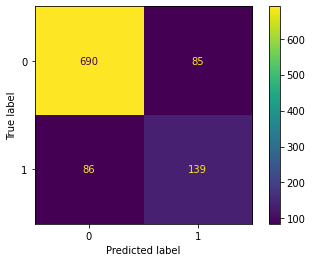

In [29]:
# Plotando representação visual da matriz de confusão
cm_display = ConfusionMatrixDisplay(confusion).plot()
plt.show()

In [30]:
# Calculando taxa de acerto e erro do modelo
hit_rate = accuracy_score(target_valid, predicted_valid)
error_rate = 1 - hit_rate
hit_rate

0.829

In [31]:
# Calculando precisão do modelo
precision = precision_score(target_valid, predicted_valid)
precision

0.6205357142857143

In [32]:
#Caculando sensibilidade do modelo
recall = recall_score(target_valid, predicted_valid)
recall

0.6177777777777778

In [33]:
# calculando f1_score
f1_score(target_valid, predicted_valid)

0.6191536748329621

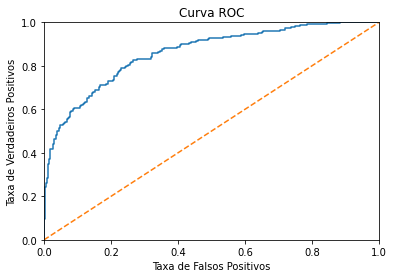

In [34]:
# plotando curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')

plt.show()

In [35]:
# Calculando área sobre a curva ROC
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8589476702508961


### Abordagem 2: Resampling

**Oversampling**

In [36]:
# Criando função que irá aumentar a amostra em n repetições
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [37]:
# Aplicando a função
features_upsampled, target_upsampled = upsample(
    label_train, target_train, 10
)

In [38]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10)
model_forest.fit(features_upsampled, target_upsampled)
predicted_valid = model_forest.predict(label_valid)
probabilities_valid = model_forest.predict_proba(label_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [39]:
# Matriz de confusão
confusion = confusion_matrix(target_valid, predicted_valid)
confusion

array([[495, 280],
       [ 30, 195]])

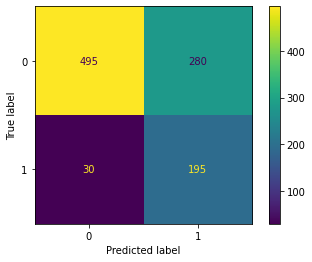

In [40]:
# Plotando representação visual da matriz de confusão
cm_display = ConfusionMatrixDisplay(confusion).plot()
plt.show()

In [41]:
# Calculando tava de acerto e erro do modelo
hit_rate = accuracy_score(target_valid, predicted_valid)
error_rate = 1 - hit_rate
hit_rate

0.69

In [42]:
# Calculando precisão do modelo
precision = precision_score(target_valid, predicted_valid)
precision

0.4105263157894737

In [43]:
# Calculando sensibilidade do modelo
recall = recall_score(target_valid, predicted_valid)
recall

0.8666666666666667

In [44]:
# Calculando F1-score do modelo após oversampling
f1_score(target_valid, predicted_valid)

0.5571428571428572

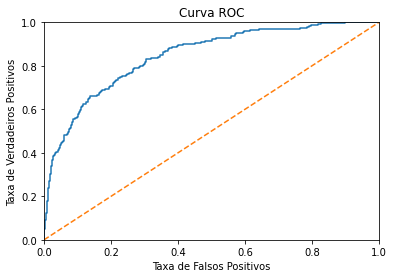

In [45]:
# Plotando curva ROC do modelo com oversampling
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')

plt.show()

In [46]:
# Calculando a área sobre a curva ROC no modelo após oversampling
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8455799283154122


**Undersampling**

In [47]:
# Criando função que irá reduzir a amostra em n frações
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [48]:
#Aplicando função
features_downsampled, target_downsampled = downsample(
    label_train, target_train, 0.1
)

In [49]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10)
model_forest.fit(features_downsampled, target_downsampled)
predicted_valid = model_forest.predict(label_valid)
probabilities_valid = model_forest.predict_proba(label_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [50]:
#Matriz de confusão após undersampling
confusion = confusion_matrix(target_valid, predicted_valid)
confusion

array([[361, 414],
       [ 15, 210]])

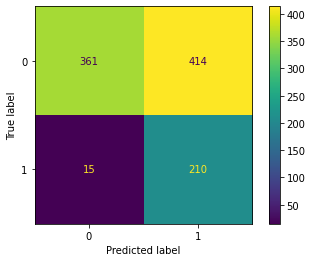

In [51]:
# Plotando representação visual da matriz de confusão do modelo com undersampling
cm_display = ConfusionMatrixDisplay(confusion).plot()
plt.show()

In [52]:
#Calculando taxa de acerto e erro do modelo com undersampling
hit_rate = accuracy_score(target_valid, predicted_valid)
error_rate = 1 - hit_rate
hit_rate

0.571

In [53]:
# Calculando precisão do modelo com undersampling
precision = precision_score(target_valid, predicted_valid)
precision

0.33653846153846156

In [54]:
#Calculando sensibilidade do modelo com undersampling
recall = recall_score(target_valid, predicted_valid)
recall

0.9333333333333333

In [55]:
# Calculando F1-score do modelo após undersampling
f1_score(target_valid, predicted_valid)

0.49469964664310967

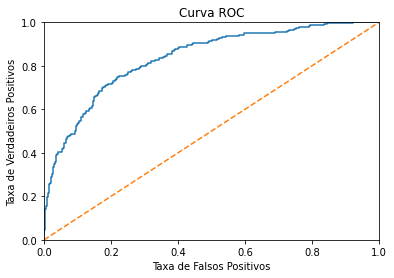

In [56]:
# Plotando curva ROC do modelo com undersampling
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')

plt.show()

In [57]:
# Calculando a área sobre a curva ROC no modelo após undersampling
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8363240143369176


**Conclusão**

Observamos que quando ajustamos o peso das classes temos uma melhoria razoável no score f1. Ao aumentar e reduzir a amostra os valores de score f1 diminuíram, com a amostra reduzida o score f1 ficou abaixo de 0,5. Com relação a curva roc e a área sobre a curva roc (AUC) de ambas abordagens obtiveram valores aproximados, entretanto a abordagem de class weighting teve valor de AUC maior.


## Verificando a qualidade do modelo treinado usando o conjunto de teste

In [58]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10, class_weight='balanced')
model_forest.fit(label_train, target_train)
train_predictions = model_forest.predict(label_train)
test_predictions = model_forest.predict(label_test)

In [59]:
# Matriz de confusão do modelo no conjunto de treinamento
confusion_train = confusion_matrix(target_train, train_predictions)
# Matriz de confusão do modelo no conjunto de teste
confusion_test = confusion_matrix(target_test, test_predictions)
print(f'matriz de confusão conjunto de treinamento:')
print(confusion_train)
print('')
print(f'matriz de confusão conjunto de teste:')
print(confusion_test)

matriz de confusão conjunto de treinamento:
[[5928  462]
 [ 307 1303]]

matriz de confusão conjunto de teste:
[[720  78]
 [ 79 123]]


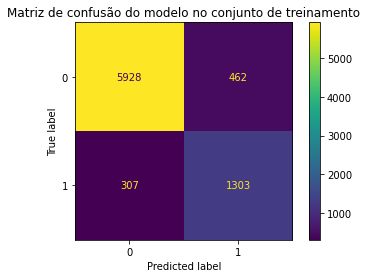

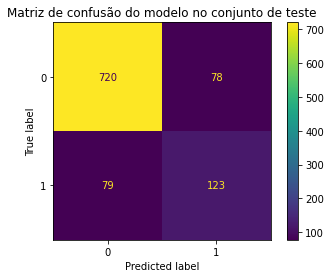

In [60]:
#Plotando matriz de confusão do modelo no conjunto de treinamento
cm_display = ConfusionMatrixDisplay(confusion_train).plot()
plt.title('Matriz de confusão do modelo no conjunto de treinamento')
plt.show()
#Plotando matriz de confusão do modelo no conjunto de teste
cm_display = ConfusionMatrixDisplay(confusion_test).plot()
plt.title('Matriz de confusão do modelo no conjunto de teste')
plt.show()


In [61]:
# Taxa de acerto do modelo no conjunto de treinamento
hit_rate_train = accuracy_score(target_train, train_predictions)
error_rate_train = 1 - hit_rate_train
# Taxa de acerto do modelo no conjunto de teste
hit_rate_test = accuracy_score(target_test, test_predictions)
error_rate_test = 1 - hit_rate_test

# Calculando precisão do modelo no conjunto de treinamento
precision_train = precision_score(target_train, train_predictions)

# Calculando precisão do modelo no conjunto de teste
precision_test = precision_score(target_test, test_predictions)

# Calculando sensibilidade do modelo no conjunto de treinamento
recall_train = recall_score(target_train, train_predictions)

# Calculando sensibilidade do modelo no conjunto de teste
recall_test = recall_score(target_test, test_predictions)

# score f1 do modelo no conjunto de treinamento
f1_train = f1_score(target_train, train_predictions)

# score f1 no conjunto de teste
f1_test = f1_score(target_test, test_predictions)

print('Resultado do modelo no conjunto de treinamento: \n')

print(f'taxa de acerto: {hit_rate_train}')
print(f'Precisão: {precision_train}')
print(f'Sensibilidade: {recall_train}')
print(f'F1-score: {f1_train} \n')

print('Resultado do modelo no conjunto de teste: \n')
print(f'taxa de acerto: {hit_rate_test}')
print(f'Precisão: {precision_test}')
print(f'Sensibilidade: {recall_test}')
print(f'F1-score: {f1_test}')

Resultado do modelo no conjunto de treinamento: 

taxa de acerto: 0.903875
Precisão: 0.738243626062323
Sensibilidade: 0.8093167701863354
F1-score: 0.7721481481481481 

Resultado do modelo no conjunto de teste: 

taxa de acerto: 0.843
Precisão: 0.6119402985074627
Sensibilidade: 0.6089108910891089
F1-score: 0.6104218362282878


**Conclusões**

Observamos uma pequena diferença entre o conjunto treinado e o conjunto de teste.

## Teste final

In [62]:
# Aplicando LabelEncoder no dataframe original
label_encoder = LabelEncoder()
for col in object_col:
    features[col] = label_encoder.fit_transform(features[col])

In [63]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10, class_weight='balanced')
model_forest.fit(features, target)
predicted_valid = model_forest.predict(features)
probabilities = model_forest.predict_proba(features)
probabilities_one = probabilities[:, 1]

In [64]:
# Matriz de confusão do modelo
confusion = confusion_matrix(target, predicted_valid)
confusion

array([[7236,  727],
       [ 375, 1662]])

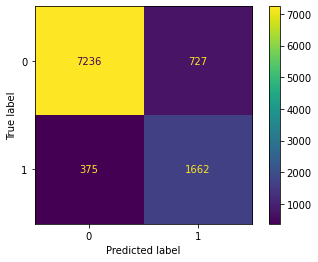

In [65]:
#Plotando matriz de confusão do modelo
cm_display = ConfusionMatrixDisplay(confusion).plot()
plt.show()

In [66]:
# Taxa de acerto do modelo
hit_rate = accuracy_score(target, predicted_valid)
error_rate = 1 - hit_rate
hit_rate

0.8898

In [67]:
# Calculando precisão do modelo
precision = precision_score(target, predicted_valid)
precision

0.6956885726245291

In [68]:
# Calculando sensibilidade do modelo
recall = recall_score(target, predicted_valid)
recall

0.8159057437407953

In [69]:
# score f1 do modelo
f1_score(target, predicted_valid)

0.7510167193854497

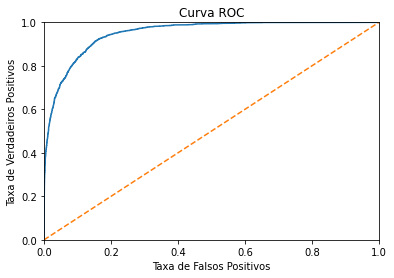

In [70]:
#Plotando curva ROC do modelo
fpr, tpr, thresholds = roc_curve(target, probabilities_one)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')

plt.show()

In [71]:
# Calculando área sobre curva ROC do modelo
auc_roc = roc_auc_score(target, probabilities_one)
auc_roc

0.9505969588975917

**conclusões**

Aplicando o modelo com o dataset completo obtivemos uma boa taxa de acertos, score f1 bem acima de 0,5 e a área sobre a curva ROC próximo a 1. Isso quer dizer que o modelo é bom em prever se um cliente deixará o banco em breve, com boa precisão, sensibilidade e especificidade.